In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [96]:
#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

df=pd.read_csv(r'C:\Users\Admin\Downloads\fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [97]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.count()


value    1238
dtype: int64

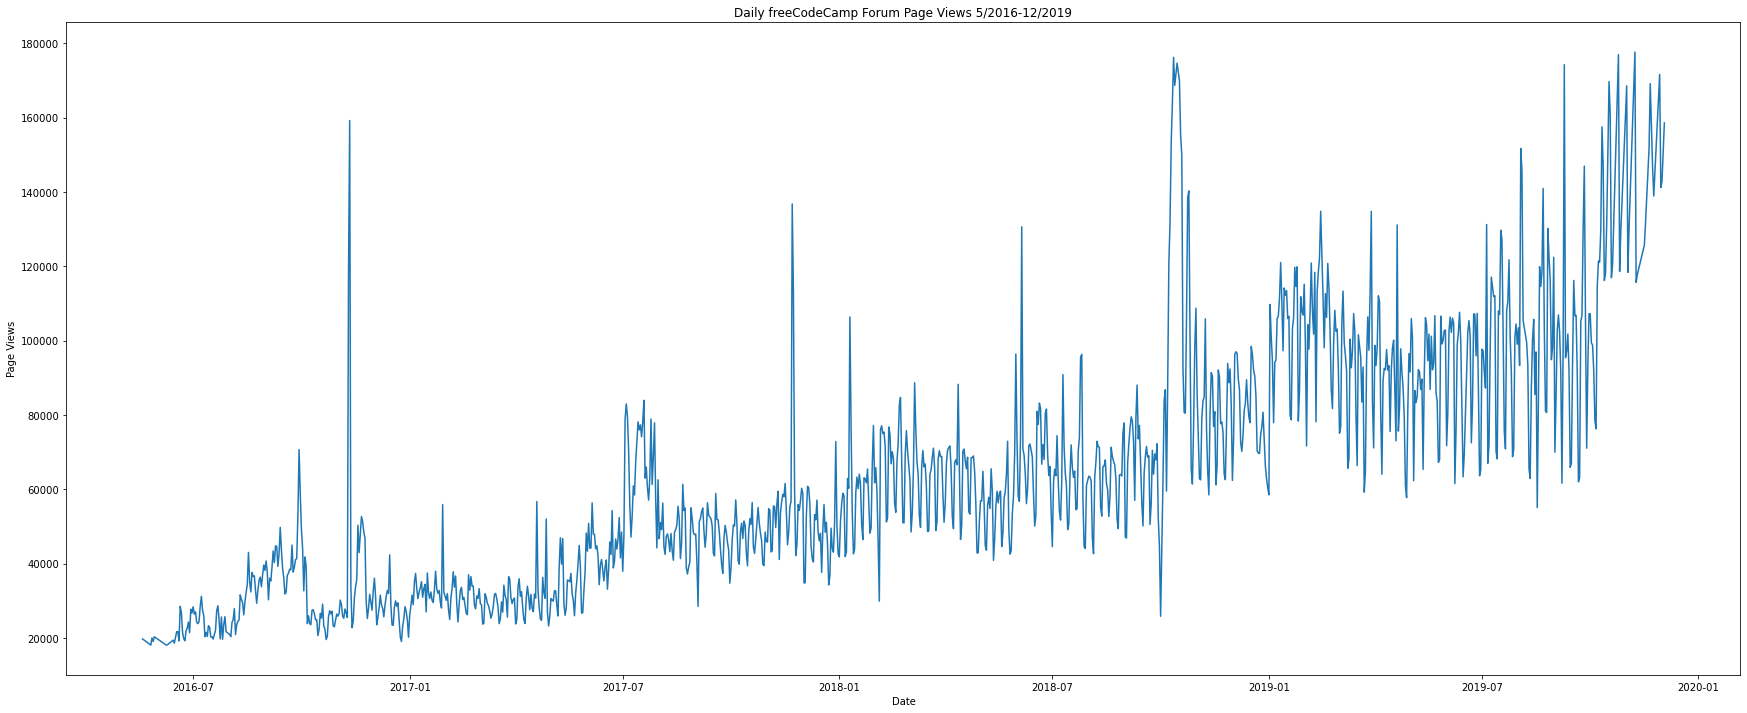

In [98]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
# The label on the x axis should be "Date" 
# The label on the y axis should be "Page Views".

def draw_line_plot():
    

    fig , ax = plt.subplots(figsize=(30,12))
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df, legend=False)
    
    
    return fig.savefig('line_plot.png')

draw_line_plot()
    

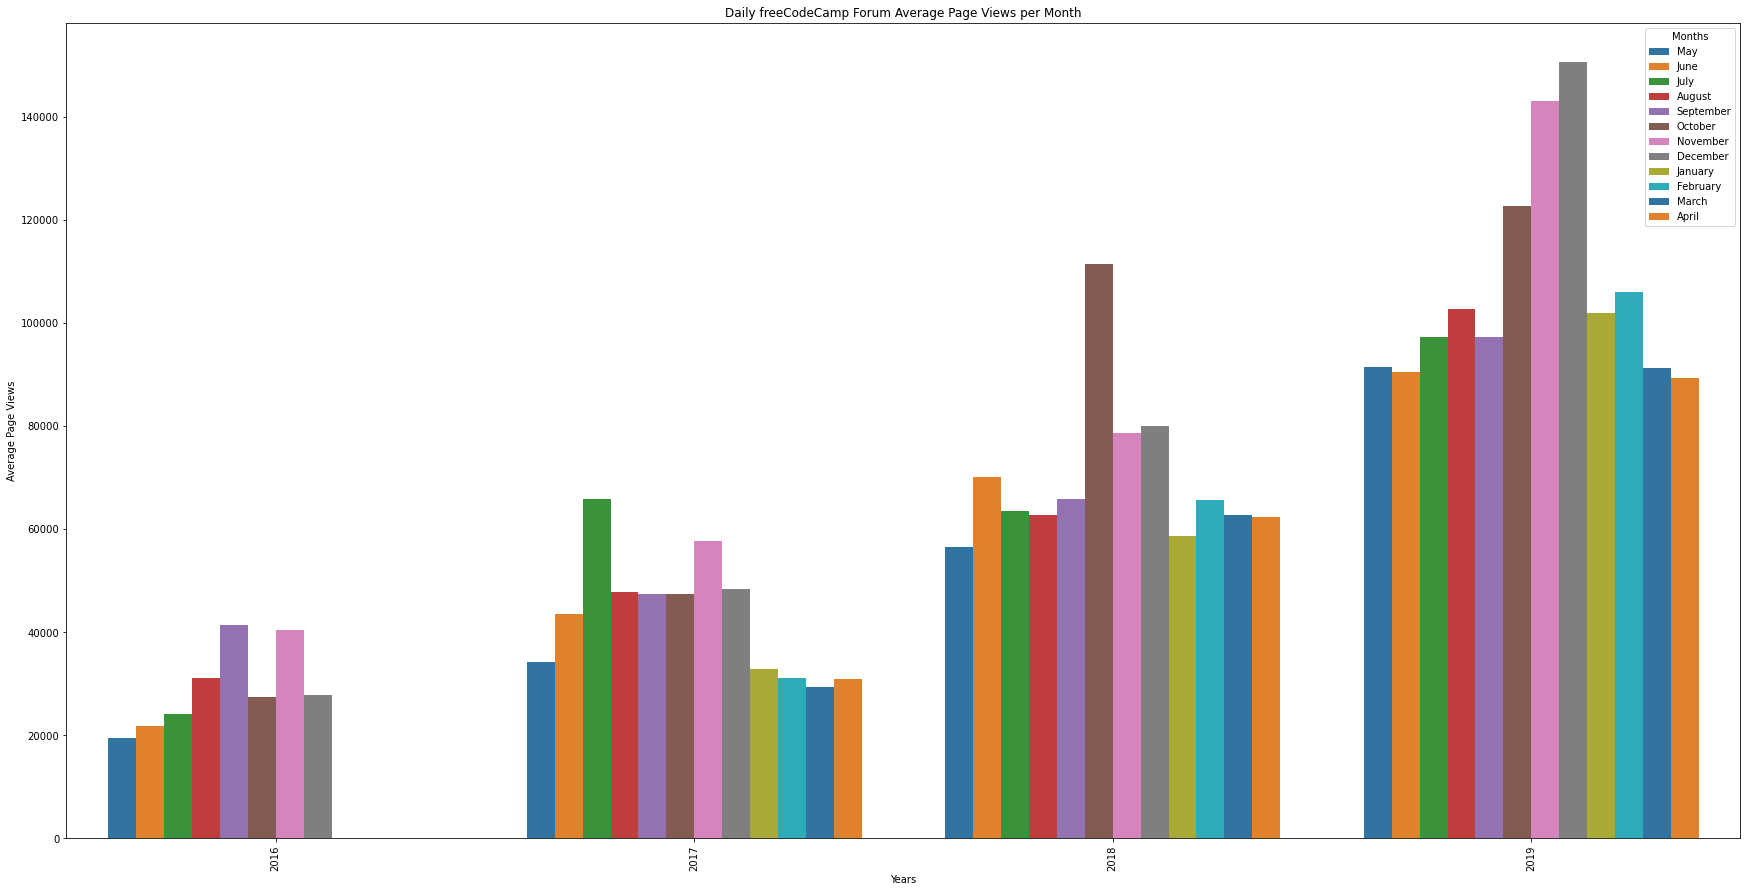

In [99]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
#It should show average daily page views for each month grouped by year.
#The legend should show month labels and have a title of "Months". 
#On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_bar = df.copy()
df_bar['Years']=df_bar.index.year
df_bar['Months']=df_bar.index.month_name()
df_bar=pd.DataFrame(df_bar.groupby(['Years','Months'], sort=False)['value'].mean().round().astype(int))
df_bar=df_bar.rename(columns={'value':'Average Page Views'})
df_bar=df_bar.reset_index()

missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }


fig, ax = plt.subplots(figsize=(30, 15))
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")
chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

fig.savefig('bar_plot.png')
                     
                



    
    
